In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

2.0.0


In [10]:
train_images.shape
len(train_labels)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

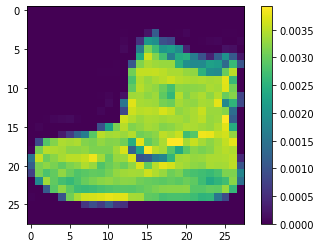

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [1]:
train_images = train_images /255.0
test_images = test_images /255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

NameError: name 'train_images' is not defined

In [3]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(128, activation='relu'),
                         keras.layers.Dense(10)])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

#model.fit(train_images, train_labels, epochs=10)

In [4]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 209us/sample - loss: 2.8797 - accuracy: 0.6551
Epoch 2/10
60000/60000 [==============================] - 12s 194us/sample - loss: 0.7732 - accuracy: 0.7140
Epoch 3/10
60000/60000 [==============================] - 11s 189us/sample - loss: 0.6827 - accuracy: 0.7350
Epoch 4/10
60000/60000 [==============================] - 12s 193us/sample - loss: 0.6349 - accuracy: 0.7564
Epoch 5/10
60000/60000 [==============================] - 12s 192us/sample - loss: 0.5954 - accuracy: 0.7832
Epoch 6/10
60000/60000 [==============================] - 11s 188us/sample - loss: 0.5711 - accuracy: 0.7913
Epoch 7/10
60000/60000 [==============================] - 12s 194us/sample - loss: 0.5514 - accuracy: 0.7979
Epoch 8/10
60000/60000 [==============================] - 13s 214us/sample - loss: 0.5378 - accuracy: 0.8032
Epoch 9/10
60000/60000 [==============================] - 13s 224us/sample - loss: 0.5320 - accuracy: 0.8

In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.4216 - accuracy: 0.7993

Test accuracy: 0.7993


In [7]:
probability_model= tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

array([5.9305935e-13, 5.7695479e-20, 0.0000000e+00, 4.7182124e-19,
       0.0000000e+00, 2.3863012e-02, 1.3736392e-26, 2.6648343e-02,
       1.8388011e-08, 9.4948858e-01], dtype=float32)

In [8]:
np.argmax(predictions[0])

9

In [10]:
test_labels[0]

9

In [8]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicteed_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})". format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),color=color)
    

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = '#7777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    


    i = 0
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  test_labels)
    plt.show()


In [10]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

NameError: name 'plt' is not defined